# **Nama Kelompok**

Tugas Besar Machine Learning Kelas IFIK 40 03
1. Amelia Martha
2. Khairul Kanters
3. M. Haikal Abdussalam

# **Teori**

Multiple Liniear Regression

Teknik statistik yang menggunakan beberapa variabel penjelas untuk memprediksi hasil dari variabel respons

# Algoritma




# **Program** 

In [0]:
# SUPERVISED (Multiple Linier Regression)
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import operator

**Import Data Raw**

In [0]:
# Upload data
from google.colab import files
dataRaw = files.upload()

Saving kc_house_data.csv to kc_house_data (2).csv


In [0]:
# Import data
data_df = pd.read_csv("kc_house_data.csv")
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Memilih Dataset

In [0]:
dataset = data_df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,17,18,19,20,2]]

# Menghapus data Nan 
dataset = dataset.fillna(0)

# Variabel
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,15].values

dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340.0,5650.0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690.0,7639.0,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720.0,8062.0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360.0,5000.0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800.0,7503.0,510000.0


In [0]:
# Membagi data menjadi Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
 
# # Membuat model Multiple Linear Regression dari Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()

# # Membuat model
# model = regressor.fit(X_train, Y_train)

# Menggunakan Gradient booster
from sklearn.ensemble import GradientBoostingRegressor
estimasi = GradientBoostingRegressor(n_estimators=2000, max_depth=5, min_samples_split=2, learning_rate=0.1, loss="ls")

# Membuat model
model = estimasi.fit(X_train, Y_train)

# Memprediksi hasil Test set
prediksi = model.predict(X_test)

# Hasil Prediksi

In [0]:
realval = pd.DataFrame(Y_test,columns=['real val'])
predval = pd.DataFrame(prediksi,columns=["predict val"])
compar = pd.concat([realval,predval],axis=1)
compar

,real val,predict val
0,865000.0,872401.871216
1,480000.0,630148.027679
2,603500.0,554574.414010
3,473000.0,502022.015744
4,650000.0,450489.142552
...,...,...
312,435000.0,378914.853135
313,280300.0,368597.325933
314,314950.0,301783.193006
315,625000.0,613950.414184


# Memunculkan Nilai Akurasi

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, prediksi)

20646879729.304317

In [0]:
akurasi = model.score(X_test, Y_test)
print("nilai akurasi : {}".format(akurasi))

nilai akurasi : 0.8538162584653166


# Plot Regressi

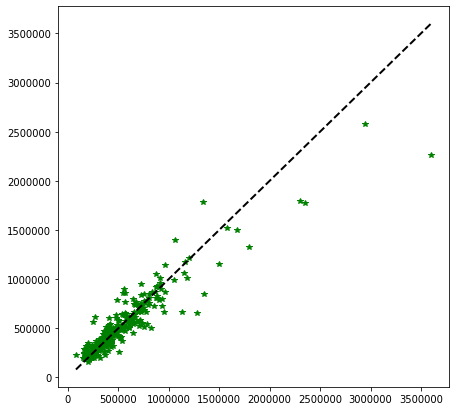

In [0]:
import matplotlib
matplotlib.rc('ytick', labelsize=10)
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(Y_test, prediksi, 'g*')
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()